# Assignment 03 Solutions

#### 1.	Is it OK to initialize all the weights to the same value as long as that value is selected randomly using He initialization?

<code>No. All weights should be initialized to different random values and should not have the same initial value.

#### 2.	Is it OK to initialize the bias terms to 0?

<code>It is possible and common to initialize the biases to be zero, since the asymmetry breaking is provided by the small random numbers in the weights.

#### 3.	Name three advantages of the SELU activation function over ReLU.

<code>Compared to ReLUs, SELUs cannot die. SELUs learn faster and better than other activation functions without needing further procession. Moreover, other activation function combined with batch normalization cannot compete with SELUs.

#### 4.	In which cases would you want to use each of the following activation functions: SELU, leaky ReLU (and its variants), ReLU, tanh, logistic, and softmax?

<code>logistic activation function = output layer when you need to estimate a probability (e.g., for binary classification),rare in hidden layer.
SELU activation function is a good default.
If you need the neural network to be as fast as possible, you can use one of the leaky ReLU variants instead (e.g., a simple leaky ReLU using the default hyperparameter value).

#### 5.	What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using an SGD optimizer?

<code>The algorithm will likely pick up a lot of speed, hopefully moving roughly toward the global minimum, but its momentum will carry it right past the minimum.

#### 6.	Name three ways you can produce a sparse model.

<code>we can do so by performing a simple procedure: compress the original data to a lower-dimensional space, learn a dense model in the low-dimensional space, then apply a sparse recovery method to obtain an approximate solution to the problem in the original, high-dimensional space

#### 7.	Does dropout slow down training? Does it slow down inference (i.e., making predictions on new instances)? What about MC Dropout?

<code>A dropout network may take 2-3 times longer to train than a normal network. Yes, dropout does slow down training, in general roughly by a factor of two. Concisely, MC-dropout is a method of performing multiple stochastic forward passes with the means of activated dropout in a neural network.

#### 8.	Practice training a deep neural network on the CIFAR10 image dataset:
1.	Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function.
2.	Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.
3.	Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?
4.	Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).
5.	Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

In [19]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ELU
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation="relu"))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="elu",kernel_initializer='he_normal'))
model.add(Dense(100, activation="softmax"))
model.summary()
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 16)                336       
_________________________________________________________________
dense_177 (Dense)            (None, 100)               1700      
_________________________________________________________________
dense_178 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_179 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_180 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_181 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_182 (Dense)            (None, 100)              

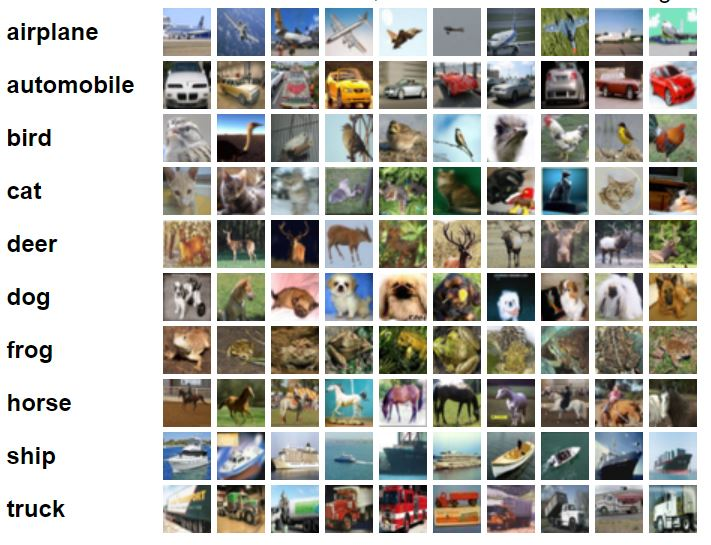

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [2]:
X_test.shape

(10000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

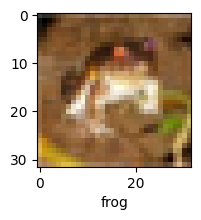

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
plot_sample(X_train, y_train, 0)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='NADAM',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, callbacks=callback)

Epoch 1/2
1563/1563 [==============================] - 21s 13ms/step - loss: 1.8625 - accuracy: 0.3342 - val_loss: 1.7586 - val_accuracy: 0.3542
Epoch 2/2
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6296 - accuracy: 0.4145 - val_loss: 1.7293 - val_accuracy: 0.3930


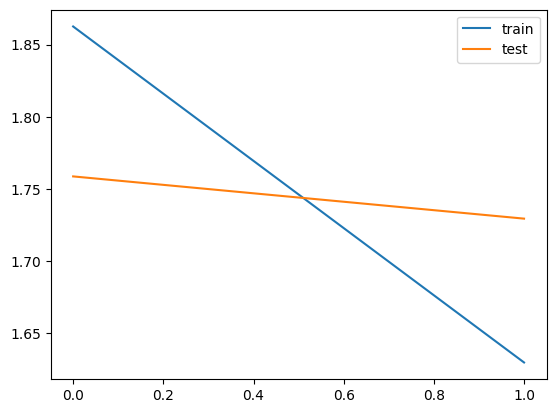

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Dense(3000, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1000, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='NADAM',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, callbacks=callback)

Epoch 1/2
1563/1563 [==============================] - 31s 19ms/step - loss: 1.7940 - accuracy: 0.3825 - val_loss: 1.6739 - val_accuracy: 0.4200
Epoch 2/2
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5409 - accuracy: 0.4561 - val_loss: 1.5009 - val_accuracy: 0.4765


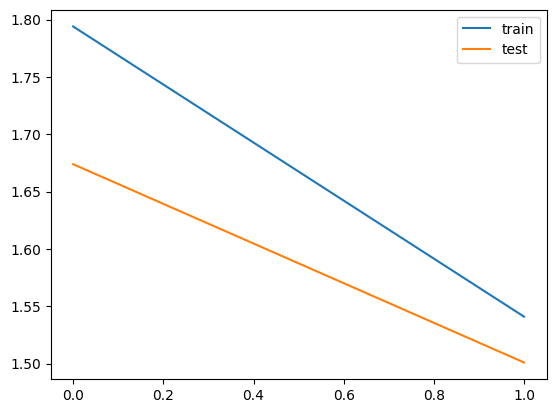

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='selu'),
        layers.Dense(1000, activation='selu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='NADAM',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, callbacks=callback)

Epoch 1/2
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3981 - accuracy: 0.2435 - val_loss: 2.0322 - val_accuracy: 0.2736
Epoch 2/2
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9442 - accuracy: 0.3145 - val_loss: 1.8237 - val_accuracy: 0.3467


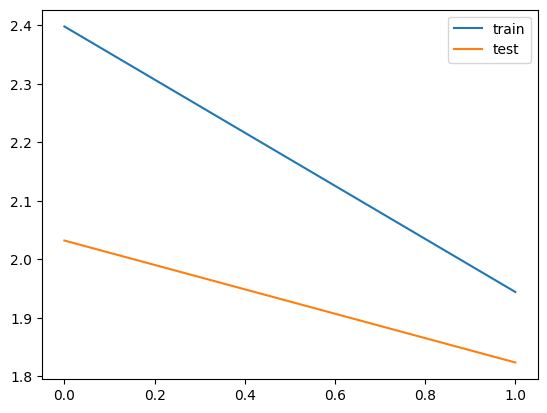

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='selu',kernel_regularizer=tf.keras.regularizers.l1(0.001)),
        layers.Dense(1000, activation='selu',kernel_regularizer=tf.keras.regularizers.l1(0.001)),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='NADAM',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, callbacks=callback)

Epoch 1/2
1563/1563 [==============================] - 24s 15ms/step - loss: 20.5086 - accuracy: 0.1422 - val_loss: 4.9452 - val_accuracy: 0.1714
Epoch 2/2
1563/1563 [==============================] - 23s 15ms/step - loss: 8.1205 - accuracy: 0.1821 - val_loss: 3.9956 - val_accuracy: 0.2100


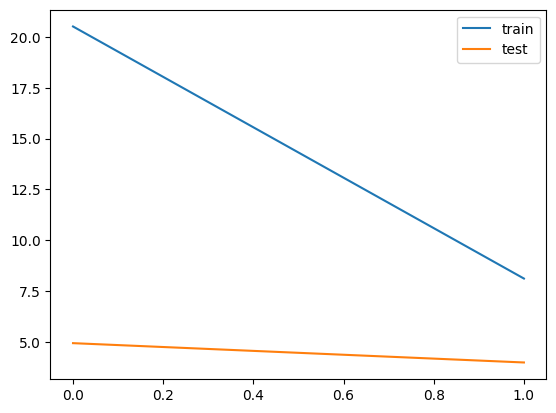

In [22]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()